# DS320 Spring 2023: project 04

<b> posted on Tue 04/11/23, due date is Thu 03/20/23, at 8:00 AM </b>

# Data visualization to explore the housing dataset

In this project, imagine that you will predict the median value of houses for each district in California given the housing dataset.

You will visualize the housing dataset to explore 

#1 the correlations of nummeric features, the relationships between each feature and the median house value, 

#2 the distributions of features to make transformations if needed,

Here you work on the housing dataset you already downloaded when we learnt about "how to work with data sources". You need to prepare your data and choose the right plot for each task.

You have your freedom to use matplotlib, pandas, and seaborn as you like

Note: (1) you should create the data for each task, do NOT change the origrinal dataframe for tasks

(2) I will mannually grade your code, so no test case will be provided, but I can give you the expectation of the outcomes for each task.


# Import libraries

In [56]:
###BEGIN SOLUTION
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn

#helping functions

COLOR = 'green'
ALPHA = .5
FONT_SIZE = 14
LABEL_SIZE = 10
TITLE_SIZE = 14
###END SOLUTION

In [57]:
###BEGIN SOLUTION
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
###END SOLUTION

# Data preparation
You need to read the housing dataset into a dataframe and name it as `df_housing`.

You should create a sub dataset from the `df_housing` for each of following tasks if there is a need

In [58]:
###BEGIN SOLUTION
from pathlib import Path

def load_housing_data():
    return pd.read_csv(Path("../../data/housing/housing.csv"))

df_housing = load_housing_data()
df_housing.head()
###END SOLUTION

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Task 1: Data distributions

We want to see how the values of data features spead out.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 1](./images/task1.png)

/tmp/ipykernel_578905/1850742298.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_housing.hist(ax = axes, bins=50, color = COLOR, alpha = ALPHA)


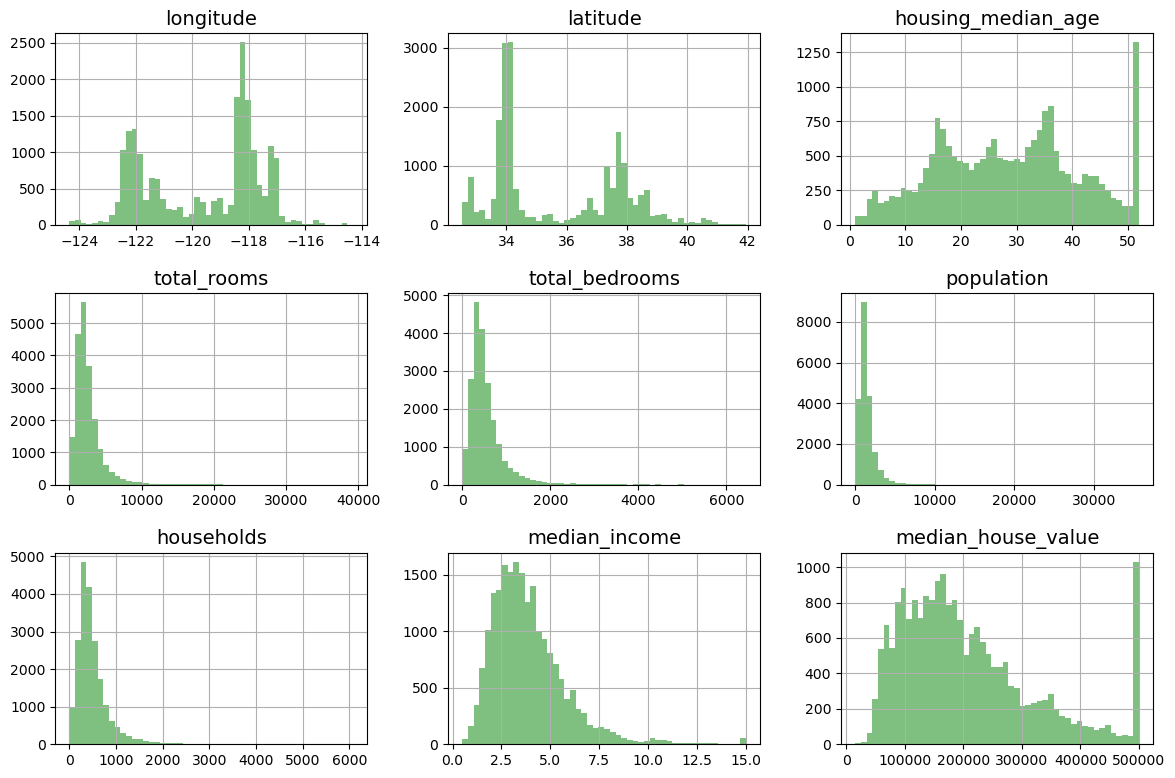

In [59]:
###BEGIN SOLUTION

fig = plt.figure(figsize = (12,8))
axes = fig.add_subplot()

plt.rc('font', size=FONT_SIZE)
plt.rc('axes', labelsize=LABEL_SIZE, titlesize=TITLE_SIZE)
plt.rc('legend', fontsize=FONT_SIZE)
plt.rc('xtick', labelsize=LABEL_SIZE)
plt.rc('ytick', labelsize=LABEL_SIZE)

df_housing.hist(ax = axes, bins=50, color = COLOR, alpha = ALPHA)
save_fig("task1")  # extra code
plt.show()
###END SOLUTION


## Task 2: Catergory Distribution

We want to catergorize the median income in ranges and compute how many districts for each catergory.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 2](./images/task2.png)

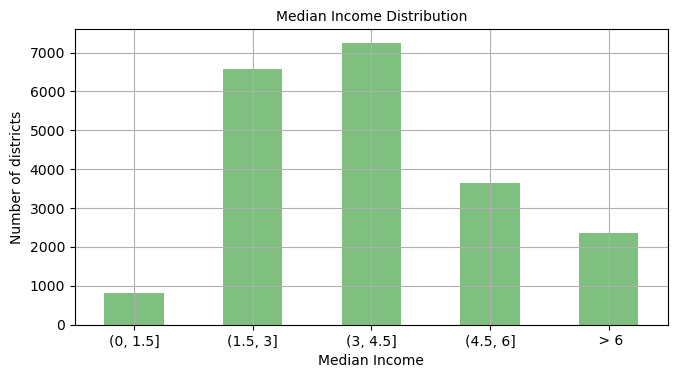

In [60]:
###BEGIN SOLUTION
BINS = [0., 1.5, 3.0, 4.5, 6., np.inf]
LABELS = ['(0, 1.5]', '(1.5, 3]', '(3, 4.5]', '(4.5, 6]', ' > 6']
income_cat = pd.cut(housing["median_income"],
                               bins=BINS,
                               labels=LABELS)

fig = plt.figure(figsize = (7,4))
ax = fig.add_subplot()

income_cat.value_counts().sort_index().plot(kind = 'bar', ax = ax, rot=0, grid=True,color = COLOR, alpha = ALPHA)

ax.set_xlabel("Median Income", fontsize = LABEL_SIZE)
ax.set_ylabel("Number of districts", fontsize = LABEL_SIZE)
ax.set_title("Median Income Distribution", fontsize = LABEL_SIZE)

save_fig("task2")
#plt.show()

###END SOLUTION

## Task 3: Correlation exploration

We want to see the correlations between every two data features

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 3](./images/task3.png)

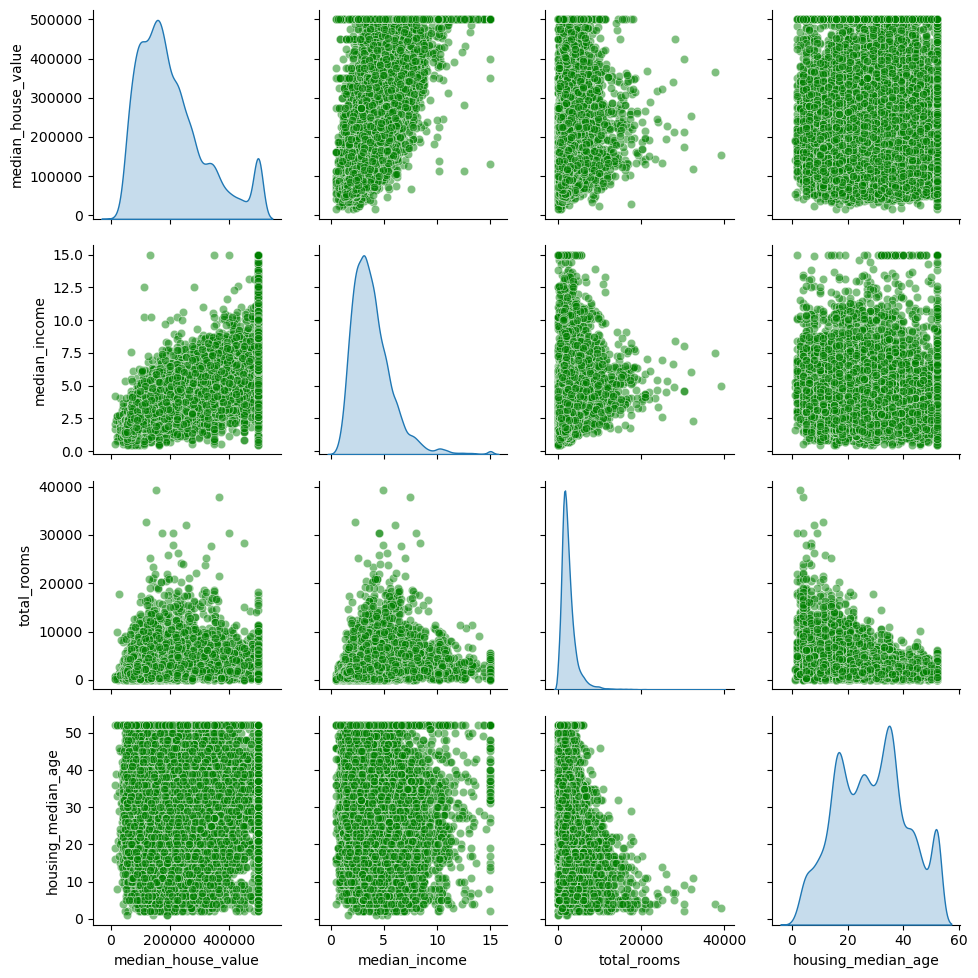

In [61]:
###BEGIN
#from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
t3 = housing[attributes]

#fig = plt.figure(figsize = (12,8))
#ax = fig.add_subplot()

#scatter_matrix(t3, figsize=(12, 8), color = COLOR, alpha = ALPHA)
#save_fig("task3")

ax = seaborn.pairplot(data = t3, diag_kind="kde", 
             plot_kws={"alpha": ALPHA, "color": COLOR})
save_fig("task3")

plt.show()
###END SOLUTION

## Task 4: median_income vs. median_house_value

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so letâ€™s zoom in on their scatterplot.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 4](./images/task4.png)


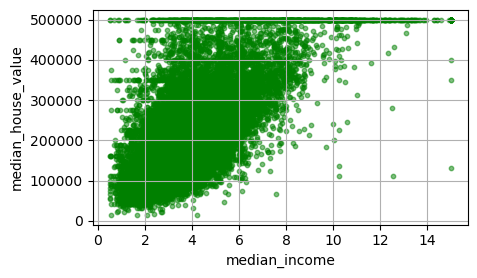

In [62]:
###BEGIN SOLUTION
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot()

df_housing.plot(kind="scatter", ax = ax, s = 10, x="median_income", y="median_house_value", 
                color = COLOR, alpha=ALPHA, grid=True)
save_fig("task4")
plt.show()
#END SOLUTION

## Task 5: Visualize Geographical Data
We want to see how the median house values spread out over the locations (longtitude, latitude) and population.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 5](./images/task5.png)


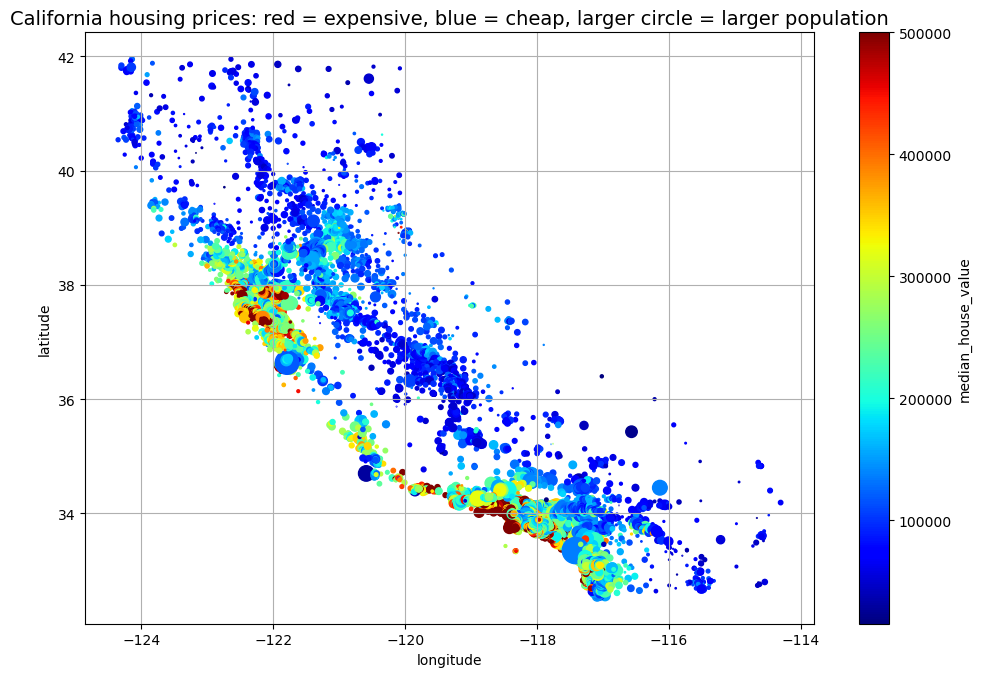

In [63]:
###BEGIN SOLUTION
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot()

housing.plot(kind="scatter", ax = ax, x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True, sharex=False, legend = False)
ax.set_title("California housing prices: red = expensive, blue = cheap, larger circle = larger population")
save_fig("task5")  # extra code
plt.show()
###END SOLUTION